In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('breast-cancer-wisconsin.csv')

In [3]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [9]:
df.isnull().sum()

id       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
class    0
dtype: int64

In [11]:
df=df.drop(['id'],axis=1)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [21]:
df.loc[(df['class']==2),'class']=0
df.loc[(df['class']==4),'class']=1

In [23]:
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [30]:
df=df[(df!='?').all(axis=1)]

In [31]:
df['class'].value_counts()

0    444
1    239
Name: class, dtype: int64

In [35]:
X=df.iloc[:,df.columns!='class']
y=df.iloc[:,df.columns=='class']
y=y.values.ravel()

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
scores

array([0.91304348, 0.98550725, 0.95652174, 0.94202899, 1.        ,
       0.97058824, 0.98529412, 1.        , 0.98529412, 0.98507463])

In [38]:
scores.mean()

0.972335254672927

In [39]:
# search for an optimal value for K for KNN
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
k_scores

[0.9563079741955185,
 0.946035169421435,
 0.9679228537618811,
 0.9679448028400198,
 0.972335254672927,
 0.969415391075314,
 0.9723358908780904,
 0.9665174765558397,
 0.969458653026428,
 0.968009377664109,
 0.970929241261722,
 0.968009377664109,
 0.967988064791134,
 0.966538789428815,
 0.966538789428815,
 0.966538789428815,
 0.966538789428815,
 0.9650895140664961,
 0.9650895140664961,
 0.965068201193521,
 0.965068201193521,
 0.963618925831202,
 0.963618925831202,
 0.963618925831202,
 0.963618925831202,
 0.9621696504688831,
 0.963618925831202,
 0.9607203751065644,
 0.9621696504688831,
 0.9607203751065644]

Text(0,0.5,'Cross-Validation Accuracy')

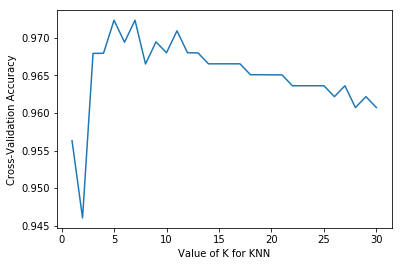

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) vs 
#    the cross-validated accuracy (y-axis)
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [41]:
#10-fold cross-validation with the best KNN model
knn=KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn,X,y,cv=10).mean()

0.9723358908780904